In [22]:
import pandas as pd
import numpy as np
import nltk
import os
import nltk.corpus
import matplotlib as mpl
import matplotlib.pyplot as plt

In [37]:
df=pd.read_csv('got_scripts_breakdown.csv', sep=';')
df.head()

,Column1,Season,Episode,Sentence,Name,N_serie,N_Season,Emision Date
0,1,Season 1,winter is coming,What d’you expect? They’re savages One lot ste...,waymar royce,1,1,17/04/2011
1,2,Season 1,winter is coming,I’ve never seen wildlings do a thing like this...,will,1,1,17/04/2011
2,3,Season 1,winter is coming,How close did you get?,waymar royce,1,1,17/04/2011
3,4,Season 1,winter is coming,Close as any man would,will,1,1,17/04/2011
4,5,Season 1,winter is coming,We should head back to the wall,gared,1,1,17/04/2011


In [8]:
df.dtypes

Column1          int64
Season          object
Episode         object
Sentence        object
Name            object
N_serie          int64
N_Season         int64
Emision Date    object
dtype: object

In [21]:
df.columns = list(map(str, df.columns))

In [61]:
# lines_count has the information of the total number of lines each character has in each season
lines_count = df.groupby(['Season', 'Name'])['Sentence'].count().reset_index(name='count')
lines_count.head()

,Season,Name,count
0,Season 1,a voice,1
1,Season 1,addam marbrand,1
2,Season 1,all,3
3,Season 1,alliser thorne,14
4,Season 1,and grenn,2


In [122]:
top10_characters = lines_count.groupby('Name').sum().sort_values(['count'],ascending=False).head(10)

top10_characters # these are the characters that have the most lines over season 1 to 7 

,count
Name,
tyrion,1537
cersei,984
jon,954
daenerys,861
jaime,842
sansa,719
arya,690
sam,492
littlefinger,475


In [136]:
# lines_count.sort_values(['Season','count'],ascending=[1,0]).groupby('Season').head(10)
# lines_count_temp = lines_count.loc[(lines_count['Name'].isin(top10_characters.index))].sort_values(['Name','Season'])

lines_count_s1 = lines_count.loc[(lines_count['Season'] == 'Season 1') & (lines_count['Name'].isin(top10_characters.index))].sort_values(['Name'])
lines_count_s1 = lines_count_s1.drop(['Season'], axis=1).set_index('Name').rename(columns={"count": "Season 1"})
lines_count_s1

,Season 1
Name,
arya,103
cersei,118
daenerys,127
jaime,82
jon,139
littlefinger,111
sam,52
sansa,100
tyrion,212


In [146]:
lines_count_s2 = lines_count.loc[(lines_count['Season'] == 'Season 2') & (lines_count['Name'].isin(top10_characters.index))].sort_values(['Name']).drop(['Season'], axis=1).set_index('Name').rename(columns={"count": "Season 2"})
lines_count_s3 = lines_count.loc[(lines_count['Season'] == 'Season 3') & (lines_count['Name'].isin(top10_characters.index))].sort_values(['Name']).drop(['Season'], axis=1).set_index('Name').rename(columns={"count": "Season 3"})
lines_count_s4 = lines_count.loc[(lines_count['Season'] == 'Season 4') & (lines_count['Name'].isin(top10_characters.index))].sort_values(['Name']).drop(['Season'], axis=1).set_index('Name').rename(columns={"count": "Season 4"})
lines_count_s5 = lines_count.loc[(lines_count['Season'] == 'Season 5') & (lines_count['Name'].isin(top10_characters.index))].sort_values(['Name']).drop(['Season'], axis=1).set_index('Name').rename(columns={"count": "Season 5"})
lines_count_s6 = lines_count.loc[(lines_count['Season'] == 'Season 6') & (lines_count['Name'].isin(top10_characters.index))].sort_values(['Name']).drop(['Season'], axis=1).set_index('Name').rename(columns={"count": "Season 6"})
lines_count_s7 = lines_count.loc[(lines_count['Season'] == 'Season 7') & (lines_count['Name'].isin(top10_characters.index))].sort_values(['Name']).drop(['Season'], axis=1).set_index('Name').rename(columns={"count": "Season 7"})


lines_count_top10 = pd.concat([lines_count_s1, lines_count_s2, lines_count_s3, lines_count_s4, lines_count_s5, lines_count_s6, lines_count_s7], axis=1, sort=False)
lines_count_top10 =lines_count_top10.T
lines_count_top10.index.name = 'Season'
lines_count_top10

,arya,cersei,daenerys,jaime,jon,littlefinger,sam,sansa,tyrion,davos
Season,,,,,,,,,,
Season 1,103.0,118.0,127.0,82.0,139.0,111.0,52.0,100.0,212.0,NaN
Season 2,129.0,177.0,136.0,71.0,101.0,79.0,49.0,80.0,345.0,95.0
Season 3,109.0,102.0,117.0,132.0,90.0,42.0,73.0,96.0,242.0,96.0
Season 4,101.0,160.0,102.0,183.0,138.0,72.0,102.0,99.0,225.0,47.0
Season 5,79.0,188.0,128.0,104.0,162.0,91.0,99.0,95.0,186.0,52.0
Season 6,64.0,84.0,89.0,118.0,111.0,34.0,50.0,113.0,160.0,99.0
Season 7,105.0,155.0,162.0,152.0,213.0,46.0,67.0,136.0,167.0,79.0


AttributeError: 'DataFrame' object has no attribute 'set_title'

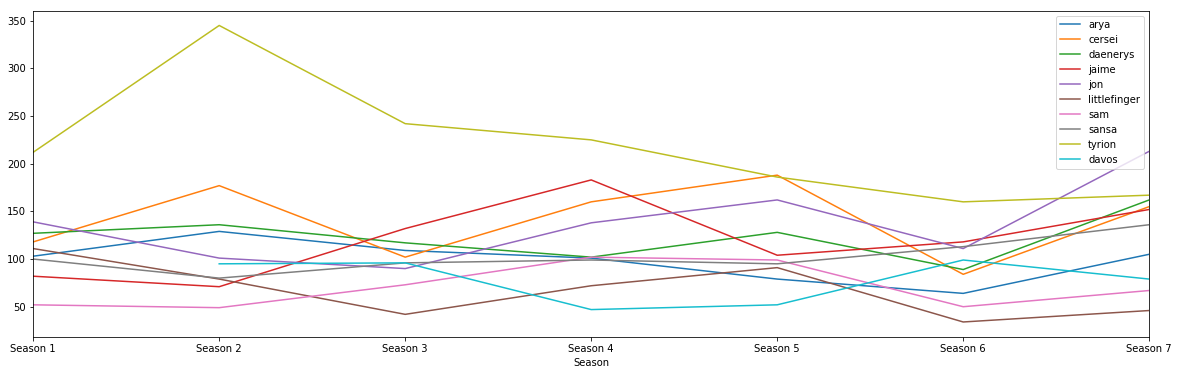

In [147]:
lines_count_top10.plot(kind='line', figsize=(20, 6)) 
lines_count_top10.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
lines_count_top10.set_ylabel('Number of Immigrants')
lines_count_top10.set_xlabel('Years')

plt.show()